<a href="https://colab.research.google.com/github/ahcamachod/1819-clustering-extrayendo-patrones-de-datos/blob/aula-6/clustering_aula_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering: Extrayendo patrones de datos
En este notebook estaremos analizando patrones en el comportamiento de clientes de tarjeta de crédito empleando un dataset de Kaggle llamado CC GENERAL.csv.

Dicho análisis estará sujeto a los resultados obtenidos a través de una técnica de aprendizaje no supervisada llamada clustering.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

# 1. Bibliotecas utilizadas
Las versiones de las bibliotecas que usaremos son las siguientes:




In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.2.2
pandas --> 1.1.5
numpy --> 1.19.5
seaborn --> 0.11.1
sklearn --> 0.22.2.post1


In [1]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv', sep = ',')
dataset.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


# 2. Obteniendo los *clusters* y entendiendo criterios y métricas de validación

In [2]:
dataset.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [3]:
dataset.drop(columns=['CUST_ID','TENURE'], inplace=True)
dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [4]:
missing = dataset.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [5]:
dataset.fillna(dataset.median(), inplace=True)
missing = dataset.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [6]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataset.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5, n_init=10, max_iter= 300)
y_pred = kmeans.fit_predict(values)

## 2.1 Calculando el coeficiente de Silhouette

In [8]:
from sklearn import metrics

labels = kmeans.labels_

silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36457606314711744


# 3. Entendiendo y calculando el índice Davies-Bouldin

In [9]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0749530537541763


# 4. Entendiendo y calculando el índice Calinski-Harabasz

In [10]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.58002074861


# 5. Validando y visualizando los *clusters*

In [11]:
scores= []

for s in range(3,11):
  score={}
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(values)
  labels = kmeans.labels_
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(values, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(values, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(values, labels)
  scores.append(score)

table = pd.DataFrame(scores)
table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.327220,1.309607,3526.440520
1,4,0.348226,1.221686,3528.673661
2,5,0.364403,1.075823,3431.784381
3,6,0.364937,1.045096,3523.509882
4,7,0.328611,1.151236,3398.305148
5,8,0.308844,1.174586,3239.098986
6,9,0.353536,1.126964,3106.456883
7,10,0.306012,1.151821,3017.651747


In [12]:
import numpy as np

random_data = np.random.rand(8950,16)

scores= []

for s in range(3,11):
  score={}
  kmeans = KMeans(n_clusters= s, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(random_data)
  labels = kmeans.labels_
  score['N_Clusters'] = s
  score['Silhouette'] = metrics.silhouette_score(random_data, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(random_data, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(random_data, labels)
  scores.append(score)

random_table = pd.DataFrame(scores)
random_table

,N_Clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,0.040131,4.000012,373.846889
1,4,0.041034,3.787417,336.420656
2,5,0.039862,3.488857,304.280802
3,6,0.040289,3.311348,281.961133
4,7,0.039646,3.205974,263.545009
5,8,0.039633,3.085010,247.037075
6,9,0.040478,2.984567,235.206203
7,10,0.041400,2.920965,224.462938


In [13]:
set1,set2,set3 = np.array_split(values,3)
sets = [set1,set2,set3 ]

scores= []

for set_ in sets:
  score={}
  n=1
  kmeans = KMeans(n_clusters= 6, n_init=10, max_iter= 300)
  y_pred = kmeans.fit_predict(set_)
  labels = kmeans.labels_
  score['Set'] = f'set{n}'
  n += 1
  score['Silhouette'] = metrics.silhouette_score(set_, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(set_, labels)
  score['Calinski-Harabasz'] = metrics.calinski_harabasz_score(set_, labels)
  scores.append(score)

estability_table = pd.DataFrame(scores)
estability_table

,Set,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,set1,0.364216,1.022584,1192.388843
1,set1,0.364671,1.061748,1169.443305
2,set1,0.372289,1.041837,1184.794477


<function matplotlib.pyplot.show>

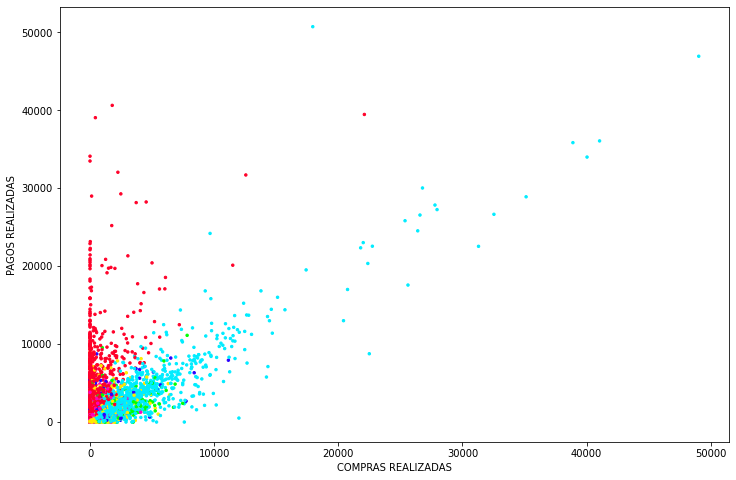

In [17]:
kmeans = KMeans(n_clusters= 6, n_init=10, max_iter= 300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

dataset['CLUSTER'] = labels

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(dataset['PURCHASES'], dataset['PAYMENTS'], c=labels, s=6, cmap='gist_rainbow')
plt.xlabel('COMPRAS REALIZADAS')
plt.ylabel('PAGOS REALIZADAS')

plt.show


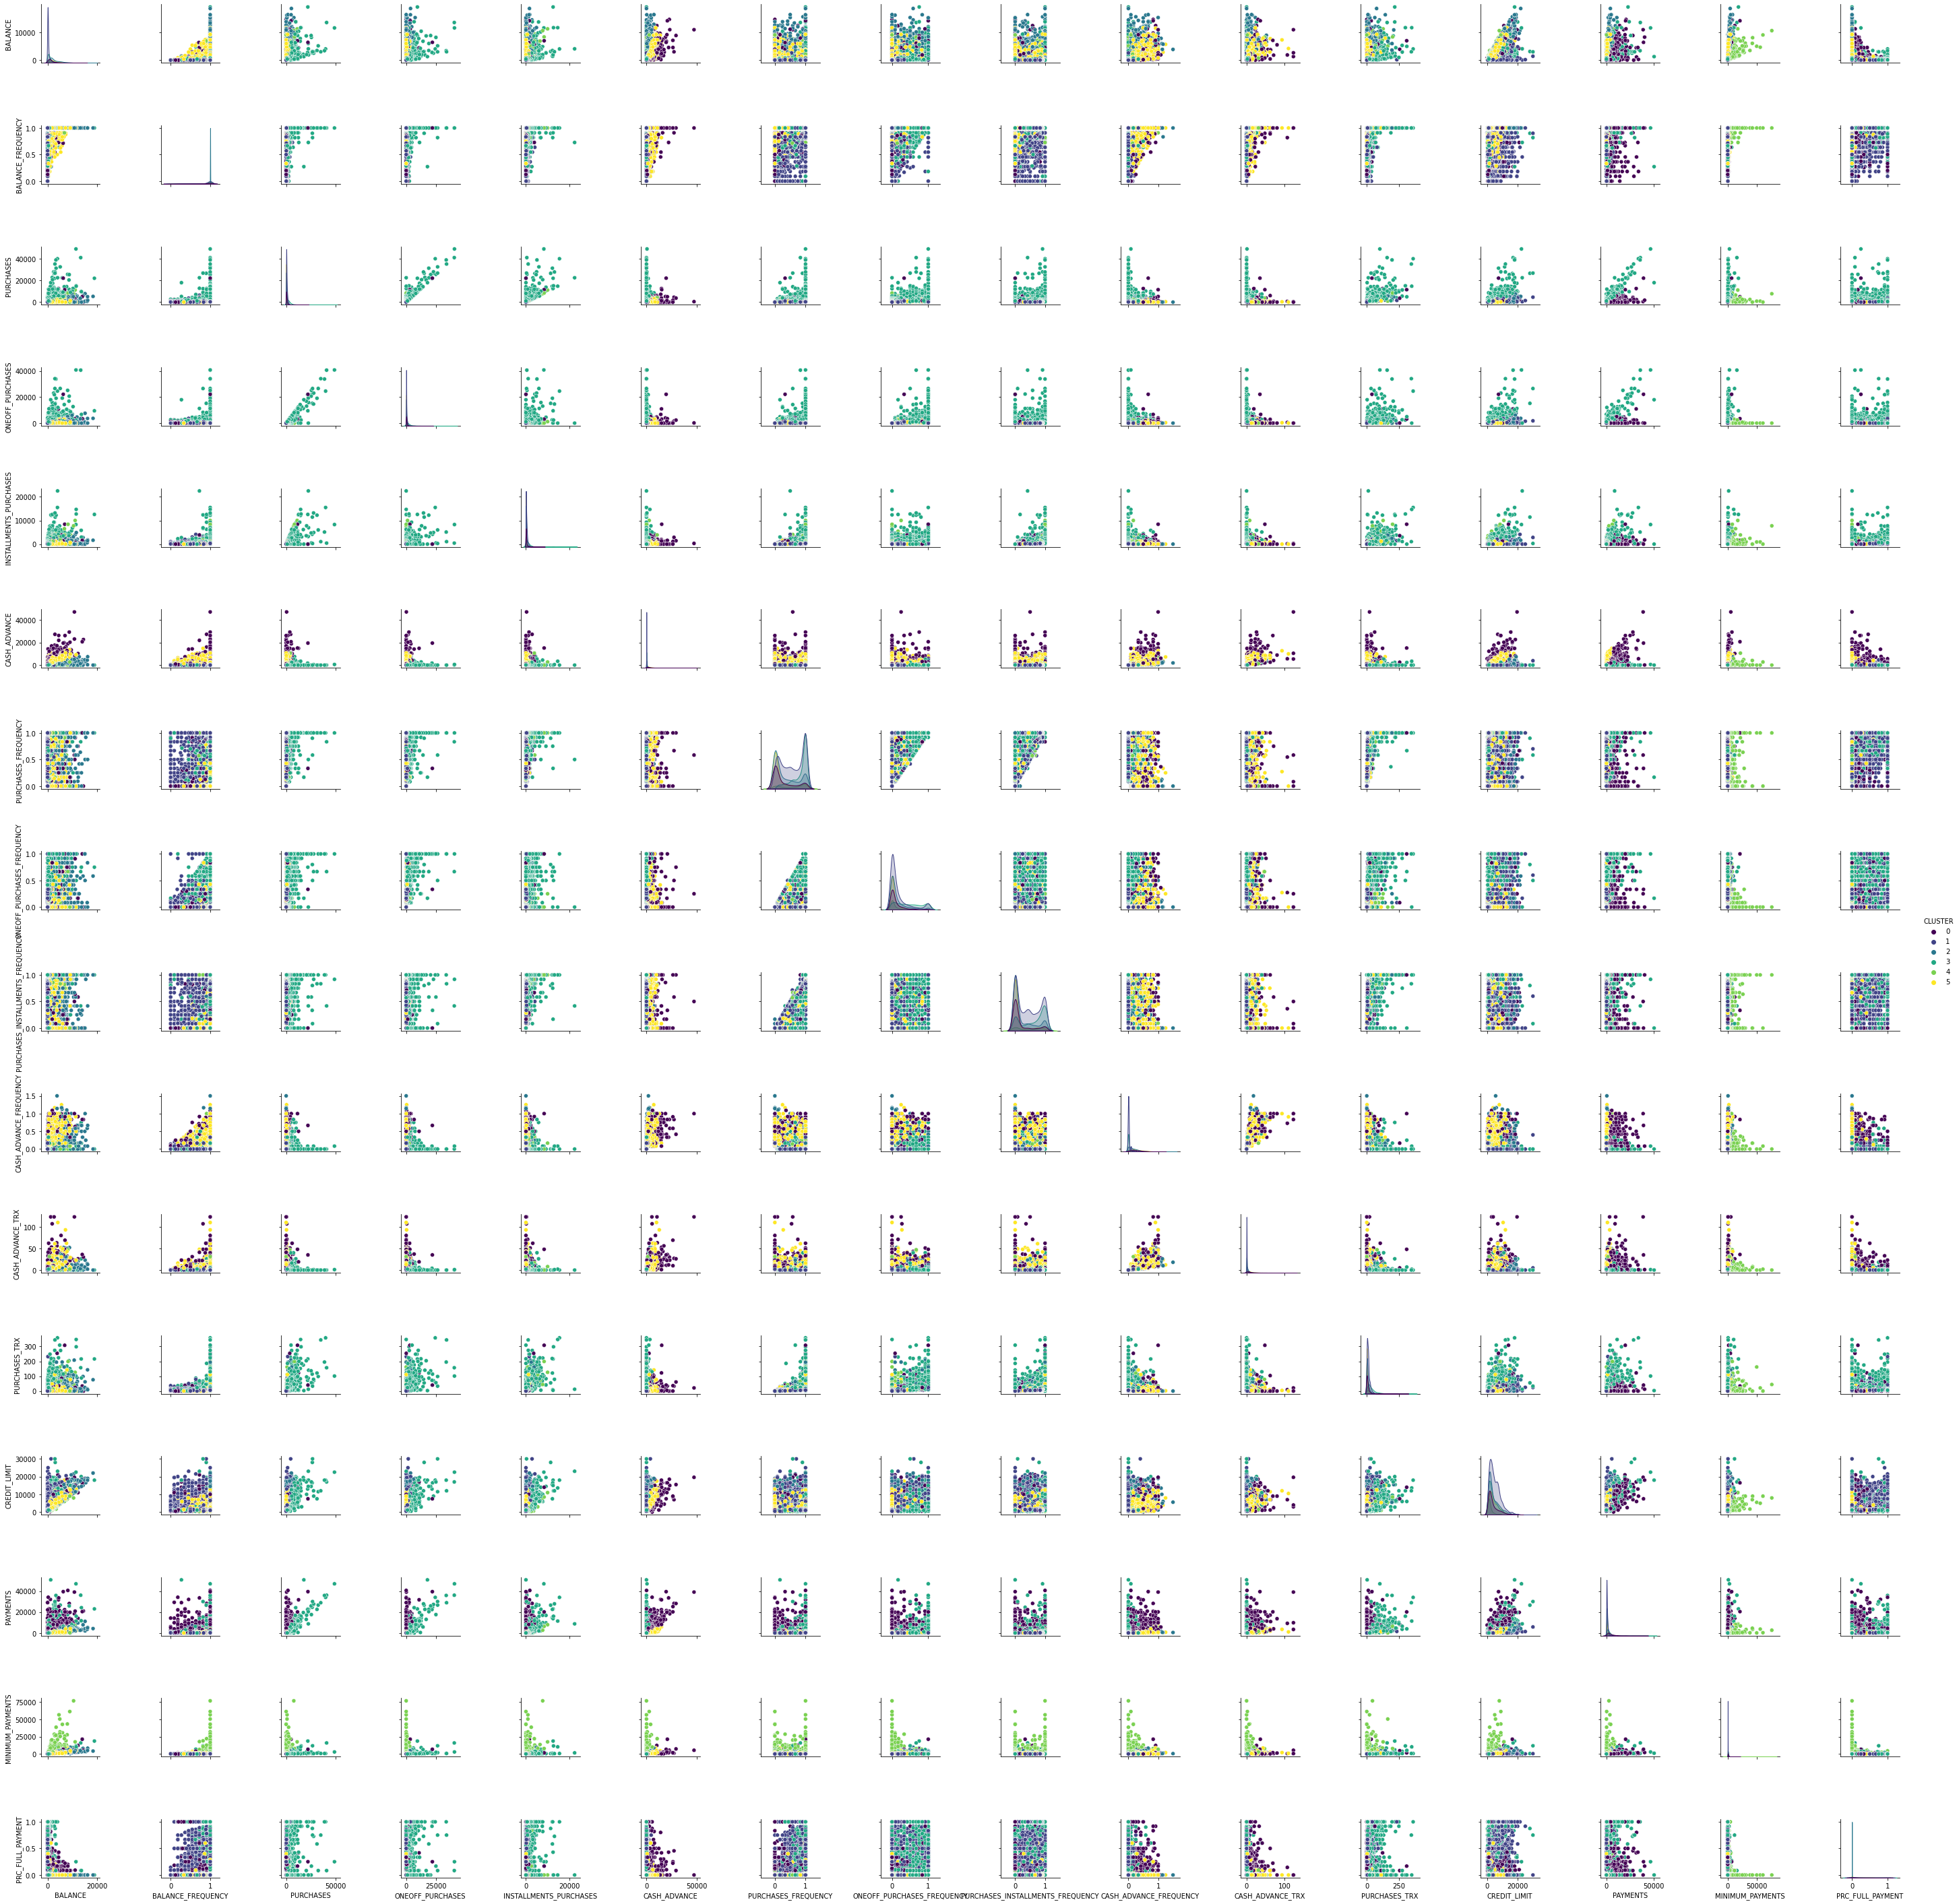

In [18]:
import seaborn as sns

sns.pairplot(dataset[0:], hue='CLUSTER', palette='viridis')

# 6. Entendiendo los valores de los atributos en los *clusters*

# 7. Interpretando los *clusters*